In [3]:
import matplotlib.pyplot as plt  # Library for creating plots and visualizations
import numpy as np  # Library for numerical computing
import pandas as pd  # Library for data manipulation and analysis
import seaborn as sns  # Library for creating plots and visualizations
from feature_engine.outliers import Winsorizer #
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [5]:
# read csv file and 
df=pd.read_csv(r"Data_Set_WT.csv")

In [6]:
# first five colomn
df.head()

,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature),Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status
0,2023-02-01,7.799746,2.294532,32.478243,85.596520,64.418706,34.690590,138.171939,58.154396,102.000000,1441.457209,14.321691,7.226060,12.649671,17.413726,No_failure
1,2023-04-29,43.441611,0.773574,-55.547015,59.187505,100.447116,-18.129465,24.924208,-5.029160,39.811354,358.359652,97.373927,147.070099,-75.409575,27.806414,Failure
2,2023-07-27,14.073105,2.071047,39.680000,80.242633,49.515000,29.550796,138.487406,44.565287,95.850662,1388.939832,14.770060,208.262689,62.468350,13.662392,No_failure
3,2023-06-05,41.162919,0.148410,-53.617603,46.304320,111.135974,-2.860951,24.471474,8.002850,16.072333,514.833604,164.625803,217.182933,-73.739098,21.769295,Failure
4,2023-05-26,18.876468,2.946286,12.629549,88.603457,83.707096,41.200000,114.508950,49.652406,71.400000,1156.208237,13.406563,32.355579,7.236546,11.193650,No_failure


In [7]:
# shape of data
df.shape

(3600, 16)

In [8]:
# finding data types
df.dtypes

date                              object
Wind_speed                       float64
Power                            float64
Nacelle_ambient_temperature      float64
Generator_bearing_temperature    float64
Gear_oil_temperature             float64
Ambient_temperature              float64
Rotor_Speed                      float64
Nacelle_temperature              float64
Bearing_temperature)             float64
Generator_speed                  float64
Yaw_angle                        float64
Wind_direction                   float64
Wheel_hub_temperature            float64
Gear_box_inlet_temperature       float64
Failure_status                    object
dtype: object

In [6]:
#finding null values
df.isnull().sum()

date                             0
Wind_speed                       0
Power                            0
Nacelle_ambient_temperature      0
Generator_bearing_temperature    0
Gear_oil_temperature             0
Ambient_temperature              0
Rotor_Speed                      0
Nacelle_temperature              0
Bearing_temperature)             0
Generator_speed                  0
Yaw_angle                        0
Wind_direction                   0
Wheel_hub_temperature            0
Gear_box_inlet_temperature       0
Failure_status                   0
dtype: int64

In [14]:
# finding duplicates in data fr
df.duplicated().sum()

0

In [25]:
df.describe()

,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature),Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature
count,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,16.391655,3.313057,11.441843,84.070038,84.278844,17.776200,193.357513,46.459032,83.034985,1394.994073,49.232251,61.240340,19.973850,29.804650
std,13.203737,2.611270,43.560698,28.291756,23.012128,29.922620,126.614608,26.619685,31.273782,550.181236,55.879599,109.467023,57.377756,29.917515
min,-5.229383,0.000000,-260.914548,9.918990,49.515000,-20.600000,0.049647,-20.526293,10.220489,0.000000,0.000000,-413.410814,-89.259933,0.000000
25%,6.378326,2.215392,1.128094,72.599362,65.971776,-3.915149,98.649102,36.218915,71.400000,1124.121099,6.409571,10.626425,-19.389715,13.963361
50%,13.871383,2.697724,9.766350,83.107151,76.969935,10.254226,184.220736,46.636309,71.400000,1388.872525,17.896149,37.307107,20.278185,16.794689
75%,21.722268,3.241911,28.031111,94.963246,106.381210,30.507231,262.878273,57.432561,102.000000,1662.558613,93.049725,91.873078,60.290198,24.728940
max,53.878126,11.884147,290.660714,143.560021,128.723582,87.541047,463.104583,121.618448,152.948102,3963.618966,178.519794,631.969292,119.092680,118.801753


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           3600 non-null   object 
 1   Wind_speed                     3600 non-null   float64
 2   Power                          3600 non-null   float64
 3   Nacelle_ambient_temperature    3600 non-null   float64
 4   Generator_bearing_temperature  3600 non-null   float64
 5   Gear_oil_temperature           3600 non-null   float64
 6   Ambient_temperature            3600 non-null   float64
 7   Rotor_Speed                    3600 non-null   float64
 8   Nacelle_temperature            3600 non-null   float64
 9   Bearing_temperature)           3600 non-null   float64
 10  Generator_speed                3600 non-null   float64
 11  Yaw_angle                      3600 non-null   float64
 12  Wind_direction                 3600 non-null   f

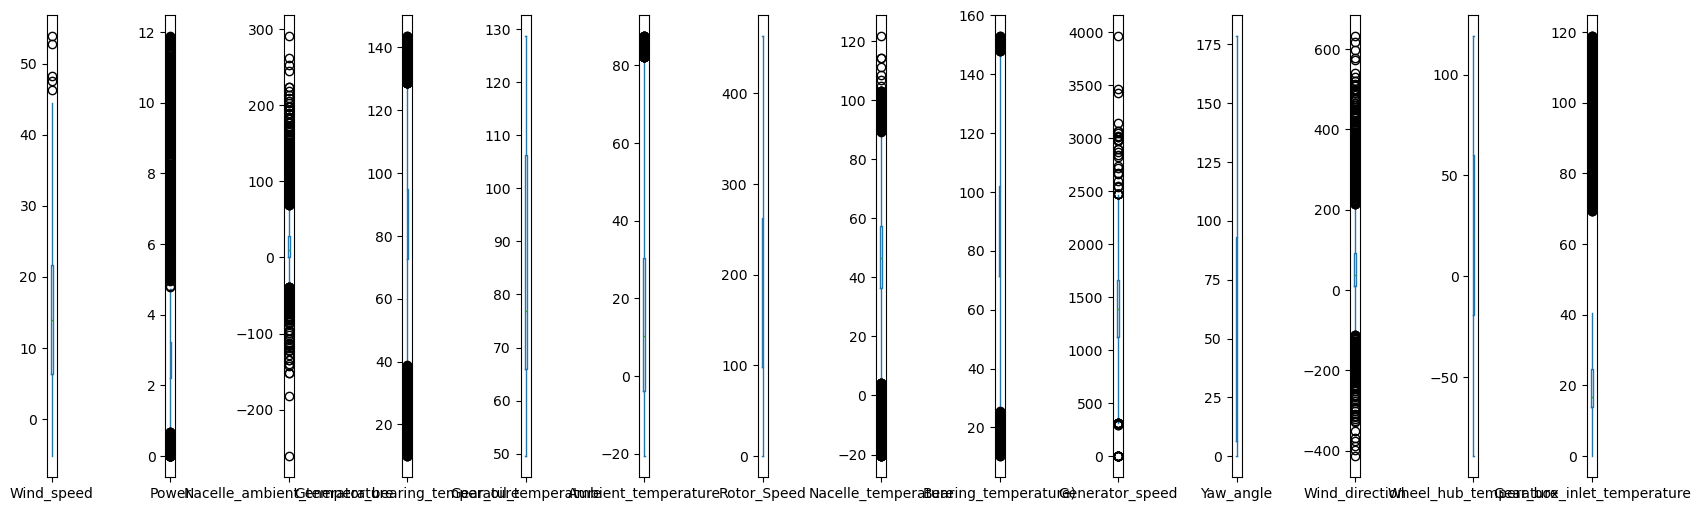

In [9]:
# detecting outliers using sub boxplot
df.plot(kind = 'box', subplots= True, sharey = False, figsize =(20,6))
plt.subplots_adjust(wspace = 10.85)
plt.show()

In [38]:
# finding outlier by IQR methed
# Step 1: Select only numerical columns
numeric_cols = df.select_dtypes(include='number').columns

# Step 2: Calculate IQR, lower limit, and upper limit for each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    print(f'Column: {col}')
    print(f'  IQR: {IQR}')
    print(f'  Lower Limit: {lower_limit}')
    print(f'  Upper Limit: {upper_limit}')
    print('---')


Column: Wind_speed
  IQR: 15.34394141075
  Lower Limit: -16.637585731875
  Upper Limit: 44.738179911125
---
Column: Power
  IQR: 1.0265187017499997
  Lower Limit: 0.6756138521250006
  Upper Limit: 4.781688659124999
---
Column: Nacelle_ambient_temperature
  IQR: 26.9030176165
  Lower Limit: -39.22643268625001
  Upper Limit: 68.38563777975
---
Column: Generator_bearing_temperature
  IQR: 22.363884529999993
  Lower Limit: 39.05353516000002
  Upper Limit: 128.50907328
---
Column: Gear_oil_temperature
  IQR: 40.40943330499999
  Lower Limit: 5.357626362500014
  Upper Limit: 166.9953595825
---
Column: Ambient_temperature
  IQR: 34.42238061275
  Lower Limit: -55.54872028937499
  Upper Limit: 82.14080216162499
---
Column: Rotor_Speed
  IQR: 164.22917124999995
  Lower Limit: -147.69465537499994
  Upper Limit: 509.2220296249999
---
Column: Nacelle_temperature
  IQR: 21.2136464325
  Lower Limit: 4.398445021250005
  Upper Limit: 89.25303075125001
---
Column: Bearing_temperature)
  IQR: 30.599999999

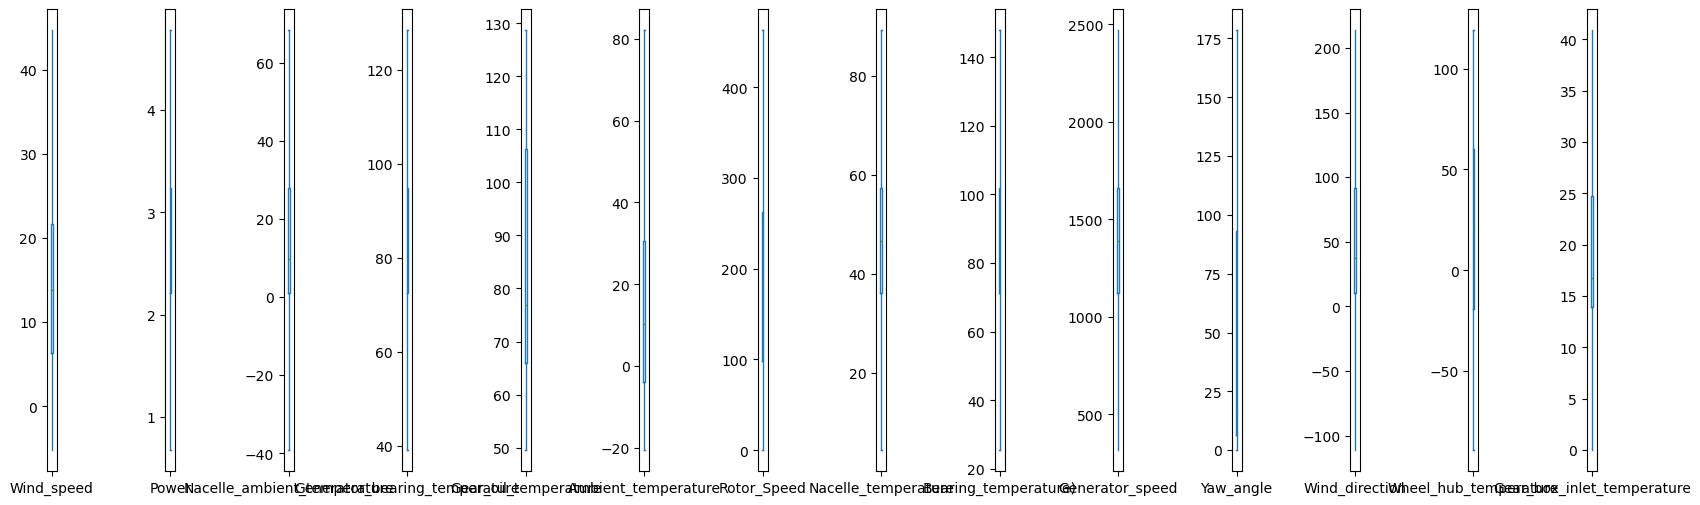

In [28]:
# trimming outliers by  Apply Winsorizer  using IQR method
# Step 1: Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Step 2: Apply Winsorizer to all numeric columns using IQR method
winsor_iqr = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=None)  # None means apply to all numeric variables

# Step 3: Fit and transform
df_winsorized = winsor_iqr.fit_transform(df[numeric_cols])

# Step 4: Replace original data with transformed if needed
df[numeric_cols] = df_winsorized
# 
df.plot(kind = 'box', subplots= True, sharey = False, figsize =(20,6))
plt.subplots_adjust(wspace = 10.85)
plt.show()

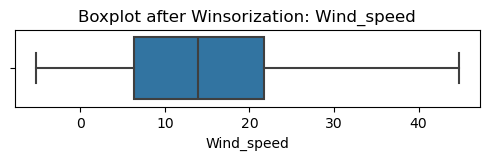

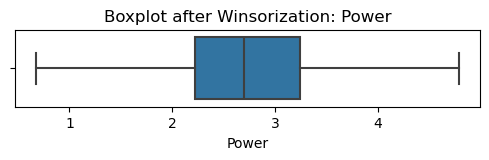

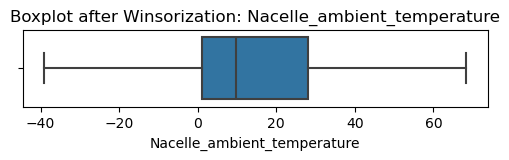

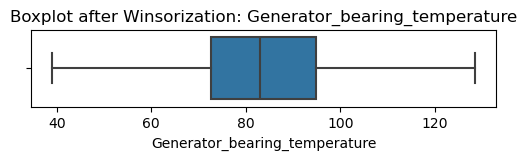

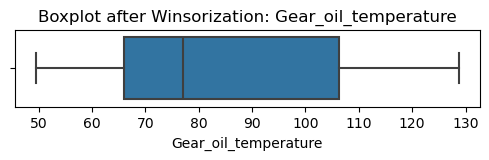

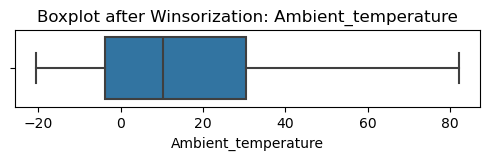

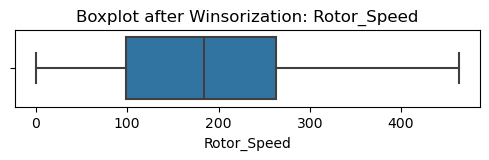

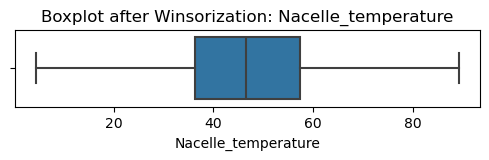

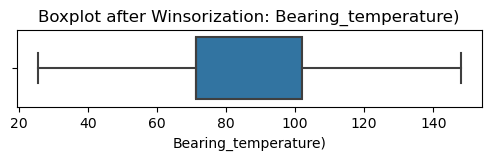

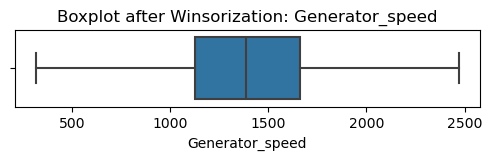

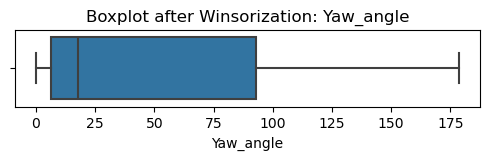

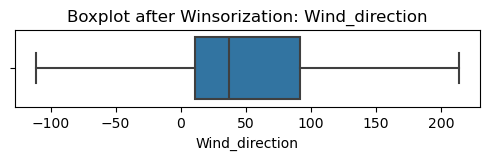

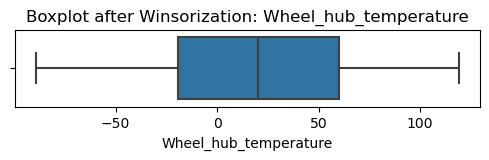

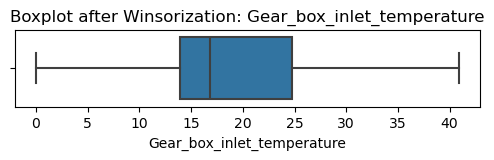

In [21]:
# box plot
# Step 1: Identify all numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Step 2: Initialize the Winsorizer for all numeric columns
winsor = Winsorizer(capping_method='iqr',
                    tail='both',
                    fold=1.5,
                    variables=numeric_cols)  # Explicitly pass all numeric columns

# Step 3: Fit and transform the entire dataset (only numeric columns will be modified)
df[numeric_cols] = winsor.fit_transform(df[numeric_cols])

# Step 4: Visualize distributions (optional)
# For example, plot a boxplot for each numerical column
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot after Winsorization: {col}')
    plt.show()

In [39]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Example column
df['Failure_Status'] = df['Failure_status']

# Apply LabelEncoder
le = LabelEncoder()
df['Failure_Status_encoded'] = le.fit_transform(df['Failure_Status'])

print(df)

            date  Wind_speed     Power  Nacelle_ambient_temperature  \
0     2023-02-01    7.799746  2.294532                    32.478243   
1     2023-04-29   43.441611  0.773574                   -39.226433   
2     2023-07-27   14.073105  2.071047                    39.680000   
3     2023-06-05   41.162919  0.675614                   -39.226433   
4     2023-05-26   18.876468  2.946286                    12.629549   
...          ...         ...       ...                          ...   
3595  2023-09-29    0.031000  4.781689                    52.884016   
3596  2023-03-10    3.198901  2.575183                     4.174863   
3597  2023-11-02    2.975921  2.992836                     6.779750   
3598  2023-06-11   19.659749  2.584704                     2.689192   
3599  2023-10-18   24.415199  0.675614                     1.139749   

      Generator_bearing_temperature  Gear_oil_temperature  \
0                         85.596520             64.418706   
1                        

In [40]:
#StandardScaler
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_standardized = df.copy()
df_standardized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Show results
print(df_standardized.head())


         date  Wind_speed     Power  Nacelle_ambient_temperature  \
0  2023-02-01   -0.651107 -0.356714                     0.757459   
1  2023-04-29    2.052077 -1.587035                    -1.651491   
2  2023-07-27   -0.175317 -0.537494                     0.999405   
3  2023-06-05    1.879254 -1.666276                    -1.651491   
4  2023-05-26    0.188984  0.170497                     0.090633   

   Generator_bearing_temperature  Gear_oil_temperature  Ambient_temperature  \
0                       0.044030             -0.863149             0.572864   
1                      -1.035503              0.702695            -1.205673   
2                      -0.174823             -1.510885             0.399798   
3                      -1.562134              1.167248            -0.691557   
4                       0.166945             -0.024849             0.792046   

   Rotor_Speed  Nacelle_temperature  Bearing_temperature)  Generator_speed  \
0    -0.435915             0.481595   

In [41]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Show results
print(df_normalized.head())


         date  Wind_speed     Power  Nacelle_ambient_temperature  \
0  2023-02-01    0.260752  0.394274                     0.666326   
1  2023-04-29    0.974052  0.023857                     0.000000   
2  2023-07-27    0.386300  0.339846                     0.733249   
3  2023-06-05    0.928448  0.000000                     0.000000   
4  2023-05-26    0.482430  0.553003                     0.481879   

   Generator_bearing_temperature  Gear_oil_temperature  Ambient_temperature  \
0                       0.520292              0.188158             0.538156   
1                       0.225072              0.643013             0.024046   
2                       0.460442              0.000000             0.488129   
3                       0.081055              0.777958             0.172658   
4                       0.553906              0.431672             0.601514   

   Rotor_Speed  Nacelle_temperature  Bearing_temperature)  Generator_speed  \
0     0.298285             0.633507   